# SpaceRocks

### Vectorized coordinate transformation and ephemeris calculation with robust unit handling.

To install, simply `pip install spacerocks`

In [1]:
from spacerocks import SpaceRock, Observe, Propagate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u
%matplotlib inline

In [ ]:
{‘a’: 81.48404137238033,
 ‘e’: 0.7094507249841506,
 ‘i’: 37.132857449687194,
 ‘lan’: 167.6781294110762,
 ‘aop’: 214.62054824981132,
 ‘top’: 2457115.3524901397}
{‘a’: 2.261165508330344e-05,
 ‘adot’: 0.0626425293290428,
 ‘b’: -1.427200794683609e-05,
 ‘bdot’: -0.03955374150304765,
 ‘g’: 0.04386010793151914,
 ‘gdot’: 0.00034576080057385533}
t0 = 2456916.7656669617

In [2]:
r = SpaceRock(alpha=2.261165508330344e-05, 
              alpha_dot=0.0626425293290428, 
              beta=-1.427200794683609e-05, 
              beta_dot=-0.03955374150304765, 
              gamma=0.04386010793151914, 
              gamma_dot=0.00034576080057385533, 
              epoch=2456916.7656669617,
              name=np.array(['2014 SK378']),
              input_coordinates='abg',
              input_frame='barycentric',
              input_angles='degrees', 
              calc_abg=True, 
              abg_obscode='W84')

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [6]:
r.e

<Quantity [219069.78021296]>

In [2]:
r = SpaceRock(a=81.48404137238033, 
          e=0.7094507249841506, 
          inc=37.132857449687194, 
          arg=214.62054824981132, 
          node=167.6781294110762, 
          t_peri=2457115.3524901397, 
          epoch=2456916.7656669617,
          name=np.array(['2014 SK378']),
          input_coordinates='keplerian',
          input_frame='barycentric',
          input_angles='degrees', 
          calc_abg=True, 
          abg_obscode='W84')

In [4]:
r.gamma

<Quantity [-0.10854082] 1 / AU>

You can also pass in just a single object or an array of objects. I'll try all of the TNOs reported to the MPC. I specified an observatory code, so a topocentric correction will be applied to the Earth's position.

### Analyzing all of the TNOs in the MPC

In [2]:
TNOs = pd.read_json('/Users/kjnapier/Desktop/distant_extended.json')
TNOs = TNOs[TNOs.Principal_desig.values.astype(str) == '2015 BP519']
rocks = SpaceRock(a=TNOs.a.values, 
                  e=TNOs.e.values, 
                  inc=TNOs.i.values, 
                  arg=TNOs.Peri.values, 
                  node=TNOs.Node.values, 
                  t_peri=TNOs.Tp.values, 
                  epoch=TNOs.Epoch.values,
                  H=TNOs.H.values, 
                  name=TNOs.Principal_desig.values.astype(str),
                  delta_H = np.random.rand(len(TNOs)),
                  rotation_period = np.random.uniform(0.2, 0.5, len(TNOs)),
                  phi0 = np.random.rand(len(TNOs)) * 2 * np.pi,
                  input_coordinates='keplerian',
                  input_frame='heliocentric',
                  input_angles='degrees', calc_abg=True, abg_obscode=807)

p = Propagate(rocks, np.linspace(2378480.5, 2378490.5, 10), model=5, calc_abg=True)

#obs_decam = Observe(p, obscode='W84', NSIDE=[128])
#obs_magellan = Observe(p, obscode=304, NSIDE=[256])
#obs_geocenter = Observe(p)

In [16]:
p.alpha

<Quantity [-1.77858311, -1.77879151, -1.7790032 , -1.77921809, -1.77943612,
           -1.77965719, -1.77988123, -1.78010815, -1.78033786, -1.78057026]>

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(obs_decam.epoch.jd, obs_decam.mag, color='black', zorder=1)
#ax.plot(obs_decam_norot.epoch.jd, obs_decam_norot.mag, color='red', zorder=2)
ax.set_ylabel('Apparent Magnitude', fontsize=14, labelpad=20)
ax.set_xlabel('JD', fontsize=14, labelpad=10)
#ax.set_xlim([2378480.5, 2378490.5])
#ax.set_ylim([27, 27.5])

In [22]:
obs_decam.astropy_table()

delta,ltt,dec,ra,phase_angle,elong,skycoord,dec_rate,ra_rate,mag,HPIX_128,name,epoch
AU,d,rad,rad,rad,rad,"deg,deg",rad / d,rad / d,,,,
float64,float64,float64,float64,float64,float64,object,float64,float64,float64,int64,str10,object
186.67578813445837,1.0781494364060131,-0.5927653804634748,6.11268383999723,0.004997262246507238,1.2603477087284378,"350.23098552966263,-33.96295454202361",4.9060433925170983e-05,-1.4259367512275371e-05,27.221502082159063,186320,2015 BP519,2378480.5
184.8146594970854,1.067400453843703,-0.594332867838198,6.119734846803794,0.004602512383055548,1.0377011961179035,"350.6349784609968,-34.05276495303529",5.512476966887096e-05,-3.7661919071643305e-05,27.11494687688735,186234,2015 BP519,2379956.702020202
182.91626371377473,1.0564362341968696,-0.5958069252265379,6.12739559935579,0.003964257940056617,0.8178971409717175,"351.0739072501202,-34.137222220147244",5.6154773550237894e-05,-5.835707867972775e-05,27.010607616297804,186233,2015 BP519,2381432.904040404
180.9458212455819,1.04505590760078,-0.5973202069029452,6.135621016624353,0.003235510583254501,0.6335382086689324,"351.54518894434295,-34.22392687341986",5.362315657660259e-05,-7.342148793202852e-05,26.91275288417523,186233,2015 BP519,2382909.106060606
178.91373189658944,1.0333195383145561,-0.5989267848575653,6.144230492974242,0.0027380056328949708,0.5151602691791884,"352.03847560300926,-34.315977009678356",4.85899327525844e-05,-8.486156663058607e-05,26.82798077478827,186230,2015 BP519,2384385.3080808083
176.8169908454989,1.0212097719377062,-0.6006209688836467,6.153299851940496,0.0027275558858497278,0.5007401237870235,"352.55811159466475,-34.4130466040913",3.96531043490386e-05,-9.358320819948694e-05,26.761377702852794,186229,2015 BP519,2385861.51010101
174.63465112500856,1.0086056288765912,-0.6025401728052209,6.162700168011972,0.003255119709730927,0.6038662836368442,"353.09671003164937,-34.52300888882246",2.6275058696692684e-05,-9.604769846619535e-05,26.716098031417207,186207,2015 BP519,2387337.712121212
172.39257946637403,0.9956565029117521,-0.6047070701787861,6.172212979409176,0.004022924463907898,0.766670259222104,"353.6417539760131,-34.64716296296573",1.0992059597207207e-05,-9.035628927474896e-05,26.693803376225617,66056,2015 BP519,2388813.914141414


In [5]:
rarate = obs_geocenter.ra_rate.to(u.arcsec / u.hour)
decrate = obs_geocenter.dec_rate.to(u.arcsec / u.hour)

In [6]:
np.sqrt(rarate**2 + decrate**2)

<Quantity [0.43930331, 0.56661052, 0.69024709, 0.78773792, 0.84899142,
           0.86879111, 0.84519069, 0.78445657, 0.69675768, 0.59772893,
           0.51568744, 0.48603544, 0.52757916, 0.62061192, 0.73150235,
           0.83441373, 0.90983572, 0.94796906, 0.94446865, 0.89713442,
           0.81354157, 0.71176358, 0.62146817, 0.58921187, 0.64671731,
           0.77494622, 0.92992509, 1.07763486, 1.19822272, 1.27776331,
           1.31132686, 1.30205251, 1.25560228, 1.18383377, 1.10726621,
           1.04888282, 1.03004184, 1.06452954, 1.14818584, 1.26097451,
           1.38009893, 1.4891057 , 1.57375569, 1.62388883, 1.64254832,
           1.63552916, 1.61347569, 1.60045089, 1.62057794, 1.69036445,
           1.81763056, 2.00036945, 2.22378864, 2.47149402, 2.73497874,
           3.00673425, 3.27593497, 3.54058921, 3.79960205, 4.0427555 ,
           4.26064279, 4.44097397, 4.55785928, 4.57875136, 4.48463956,
           4.27049069, 3.95206127, 3.57823248, 3.20561063, 2.87766964,
      

Text(0.5, 0, 'Rate of motion (arcsec per hour)')

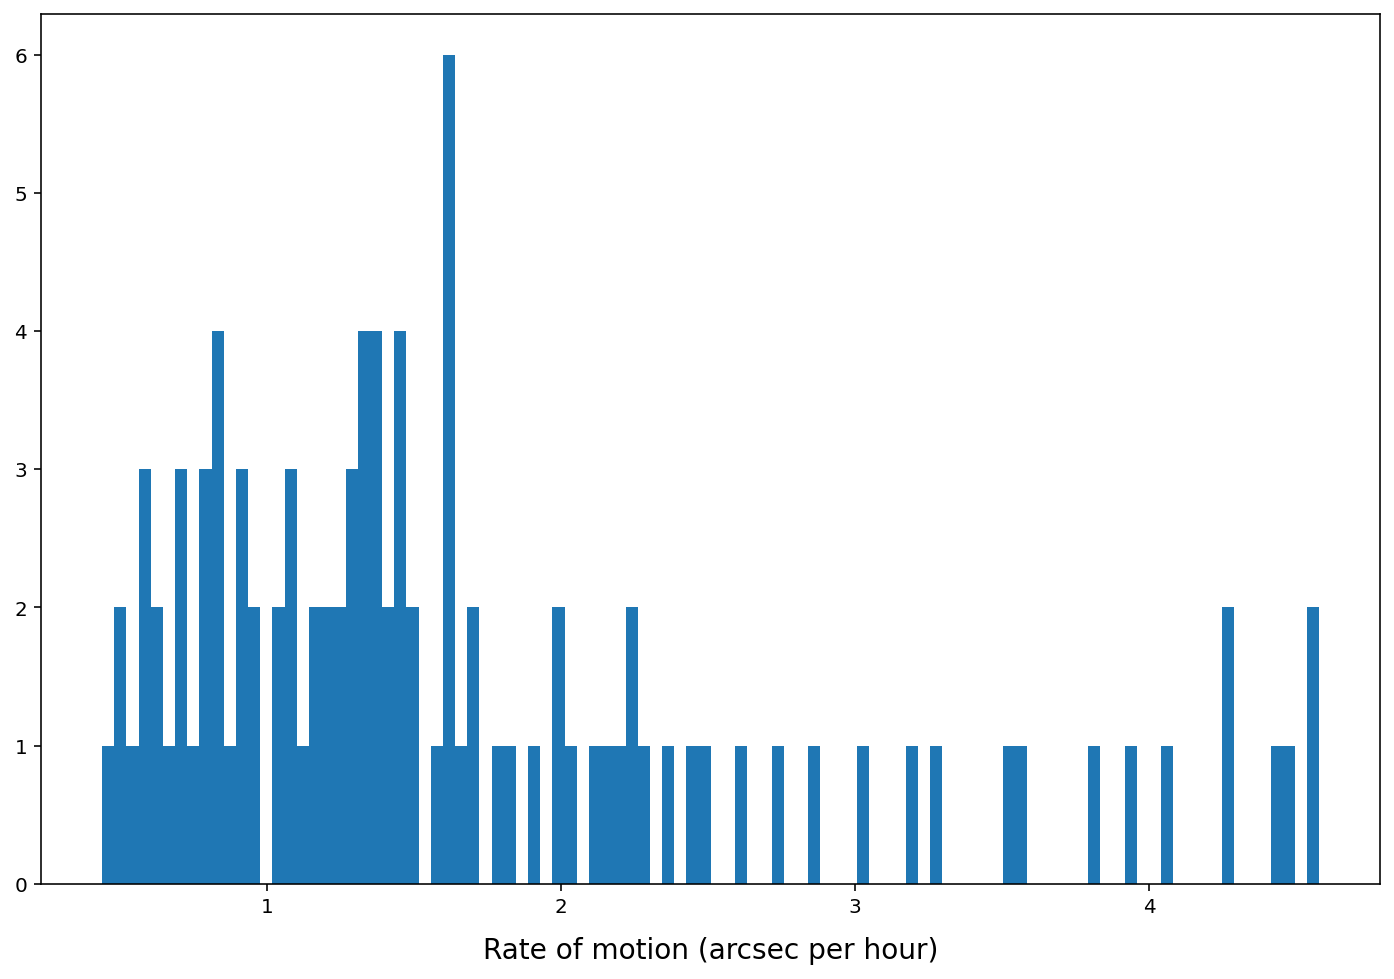

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
_ = ax.hist(np.sqrt(rarate**2 + decrate**2).value, bins=100)
ax.set_xlabel(r'Rate of motion (arcsec per hour)', fontsize=14, labelpad=10)

In [23]:
rocks = rocks[rocks.e > 0.001]

In [24]:
rocks2 = SpaceRock(x=rocks.x.value, 
                   y=rocks.y.value, 
                   z=rocks.z.value, 
                   vx=rocks.vx.value, 
                   vy=rocks.vy.value, 
                   vz=rocks.vz.value,
                   epoch=rocks.epoch.jd,
                   H=rocks.H, 
                   name=rocks.name,
                   input_coordinates='cartesian',
                   input_frame='heliocentric',
                   input_angles='degrees')

In [8]:
from astroquery.jplhorizons import Horizons

Text(0, 0.5, 'Diff Horizons - SpaceRocks')

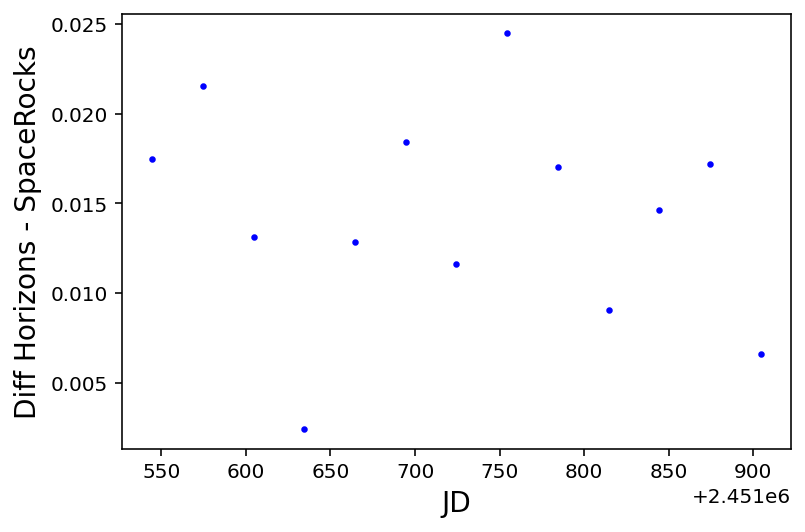

In [21]:
startdate = Time('2000-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, startdate.jd + 1*365.25, 30), scale='utc', format='jd' )
tno_id = '2015 BP519'
TNO_Horizons = Horizons(id=tno_id)
elements = TNO_Horizons.elements()[0]
ephem_Horizons = Horizons(id=tno_id, location='W84',
                          epochs={'start':testdates[0].iso, 'stop':testdates[-1].iso, 'step':'30d'}).ephemerides()
TNO = SpaceRock(a=elements['a'],
                  e=elements['e'],
                  inc=elements['incl'],
                  arg=elements['w'],
                  node=elements['Omega'],
                  t_peri=elements['Tp_jd'],
                  epoch=elements['datetime_jd'],
                  name=tno_id,
                  input_coordinates='keplerian',
                  input_frame='heliocentric',
                  input_angles='degrees',)
TNO_prop = Propagate(TNO, obsdates=testdates.jd, model=5)
TNO_predict = Observe(TNO_prop, obscode='W84')
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(TNO_predict.ra.deg, TNO_predict.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)
#for i, p in enumerate(pos_Horizons):
#    print(testdates[i].iso, p.ra.deg, p.dec.deg, pos_pred.ra[i].deg, pos_pred.dec[i].deg, sep[i].arcsec)
plt.scatter(testdates.jd, sep.arcsec, color='b', s=5)
plt.xlabel('JD', fontsize=14)
plt.ylabel('Diff Horizons - SpaceRocks', fontsize=14)

---